
## Exercise 1: Bayes' Theorem

### 1. Text Processing and Bayes' Theorem

We begin by reviewing the theory of Bayes' Theorem.

### Bayes' Theorem

Bayes' Theorem allows us to calculate the probability of an event based on prior knowledge of conditions related to the event. In other words, it helps us update our belief about the occurrence of an event given new evidence.

The formula is:

$[
P(c|x) = \frac{P(x|c)P(c)}{P(x)}
]$

Where:
- $( P(c|x) )$ is the posterior probability: the probability of class $( c )$ given the data $( x )$.
- $( P(x|c) )$ is the likelihood: the probability of the data $( x )$ given that the event belongs to class $( c )$.
- $( P(c) )$ is the prior probability: the initial probability of class $( c )$ before seeing the data.
- $( P(x) )$ is the evidence: the total probability of the data $( x )$.

Using Bayes' Theorem, we can estimate the probability of an event occurring based on prior knowledge and new evidence.

### Example of Bayes' Theorem

Consider an example with 100 healthy individuals and 100 COVID-19 patients. The test results are as follows:

|  | COVID Positive | COVID Negative |
|--|--|--|
| Healthy | 10 | 90 |
| Infected | 95 | 5 |

Assume 60% of the population is infected. What is the probability that a person who tested positive is actually healthy?

**Solution:**

1. **Prior Probability**:
    - $( P(\text{Healthy}) = 40\% )$
    - $( P(\text{Infected}) = 60\% )$

2. **Likelihood**:
    - $( P(\text{Positive} | \text{Healthy}) = 0.1 )$
    - $( P(\text{Positive} | \text{Infected}) = 0.95 )$

3. **Evidence**:
    - Total positive tests: $( 0.4 \times 0.1 + 0.6 \times 0.95 )$

Using Bayes' formula:

$[
P(\text{Healthy} | \text{Positive}) = \frac{P(\text{Positive} | \text{Healthy}) \times P(\text{Healthy})}{P(\text{Positive})}
]$

$[
P(\text{Healthy} | \text{Positive}) = \frac{0.1 \times 0.4}{0.4 \times 0.1 + 0.6 \times 0.95} = \frac{0.04}{0.04 + 0.57} = \frac{0.04}{0.61} = \frac{4}{61}
]$


## Project Description

In this project, you are given a dataset in CSV format named `books_train.csv` containing book descriptions and their corresponding categories. Another file named `books_test.csv` contains descriptions of books without categories. Your task is to determine the category of each book based on its description.

### Phase 0: EDA
1. **Part 1**: As part of the initial Exploratory Data Analysis (EDA), create a Word Cloud from the book descriptions to visualize the most frequent words.

2. **Part 2**: Analyze unigrams, bigrams, and trigrams before and after removing stopwords. Visualize the frequency of these n-grams using a bar chart to understand the impact of stopword removal.


### Phase 1: Data Preprocessing

The first phase involves preprocessing the text data. You can use the `hazm` library for this purpose. Manage the data files to ensure the best state for the project. Suggested preprocessing steps include removing punctuation, numbers, and formatting marks, as these do not provide specific information about the category of the books.

### Phase 2: Problem Solving

Using Bayes' Theorem and the concept of Bag of Words (BoW), solve the problem by determining the category of each book based on its description.

#### Bag of Words Concept:

Consider two sentences:

1. "I liked the food at this restaurant."
2. "The food at this restaurant was very good."

Using BoW, these sentences can be represented as vectors of word occurrences.

Assume the following words:

$[ \text{food, restaurant, liked, good, very, I} ]$

Each sentence is then represented as:

$[ \text{Sentence 1: [1, 1, 1, 0, 0, 1]} ]$
$[ \text{Sentence 2: [1, 1, 0, 1, 1, 0]} ]$

Using the BoW representation for the descriptions in `books_train.csv`, classify each book in `books_test.csv` using Bayes' Theorem.

### Phase 3: Enhanced Analysis

1. **Part 1**: Consider the effect of stemming on the accuracy of predictions. Use the `hazm` library to stem words and compare results.

2. **Part 2**: Investigate the impact of removing common words (e.g., stopwords) on the accuracy of predictions.

3. **Part 3**: Combine the approaches from parts 1 and 2 and analyze the improvement in accuracy.

4. **Part 4**: Draw a confusion matrix using sns heatmap for the final model.


In [ ]:
!pip install hazm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 14.8 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9297 sha256=d3faf93cc7dafbb2539f8f52492d7a517978169dd8c0cfef44e619eb0dd1247b
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from hazm import Normalizer, Lemmatizer, Stemmer, word_tokenize, stopwords_list
import matplotlib.font_manager as fm
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
book_train = pd.read_csv('/content/books_train.csv')
book_train

,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی
...,...,...,...
2545,قضاوت‌‏های امیرمؤمنان حضرت علی علیه‏‌السلام,آنچه به عنوان قضاوت‌های امیرمؤمنان حضرت علی عل...,کلیات اسلام
2546,کراماتی از مهدی موعود(عج),زینب محمودی پژوهشگر دینی است.\r\nدر بخشی از پی...,کلیات اسلام
2547,انتقام، انتقام، انتقام,«انتقام، انتقام، انتقام» داستان‌گونه‌ای با زبا...,داستان کوتاه
2548,آن مرد می‌آید,«آن مرد می‌آید» به قلم سیده‌فاطمه موسوی و به ت...,داستان کودک و نوجوانان


In [ ]:
description = book_train['description'].str.cat()


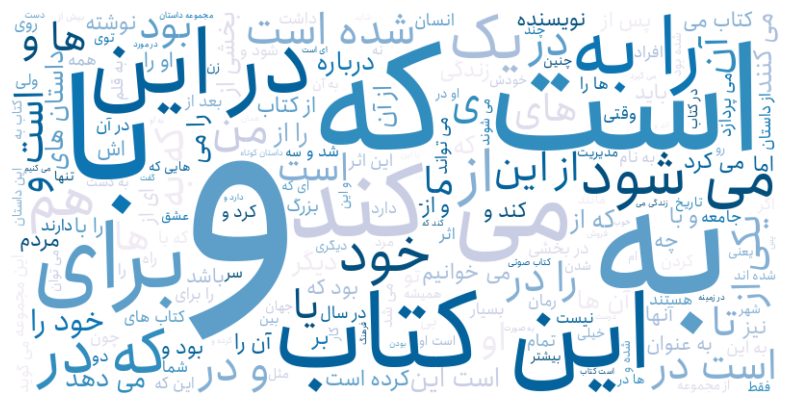

In [ ]:
palette = sns.color_palette("PuBu", 10)
palette = np.array(palette) * 255

def seaborn_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color = palette[np.random.randint(0, len(palette))]
    return tuple(color.astype(int))

wordcloud = WordCloud(
    font_path='/content/AnjomanMax-Regular.ttf',
    width=800,
    height=400,
    background_color='white',
    color_func=seaborn_color_func
    ).generate(description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# preprocess
# Initialize hazm tools
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
stopwords = set(stopwords_list())

# Function to preprocess the text
def preprocess_text(text, remove_stopwords=True, filter_non_words=True, use_stemming=False):
    text = normalizer.normalize(text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    tokens = word_tokenize(text)
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stopwords]
    if filter_non_words:
        tokens = [word for word in tokens if word.isalnum()]
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Load data
df_train = pd.read_csv('books_train.csv')
df_test = pd.read_csv('books_test.csv')

df_train['text'] = df_train['description'] + ' ' + df_train['title']
df_test['text'] = df_test['description'] + ' ' + df_test['title']


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters (no stemming): {'clf__alpha': 0.1, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}
Best score (no stemming): 0.8173669467787116
Classification Report (No Stemming - Validation Set):
                        precision    recall  f1-score   support

           جامعه‌شناسی       0.82      0.71      0.76       131
          داستان کوتاه       0.64      0.80      0.71       120
داستان کودک و نوجوانان       0.93      0.74      0.82       139
                  رمان       0.66      0.73      0.69       127
    مدیریت و کسب و کار       0.87      0.93      0.90       121
           کلیات اسلام       0.92      0.87      0.89       127

              accuracy                           0.79       765
             macro avg       0.80      0.80      0.80       765
          weighted avg       0.81      0.79      0.80       765



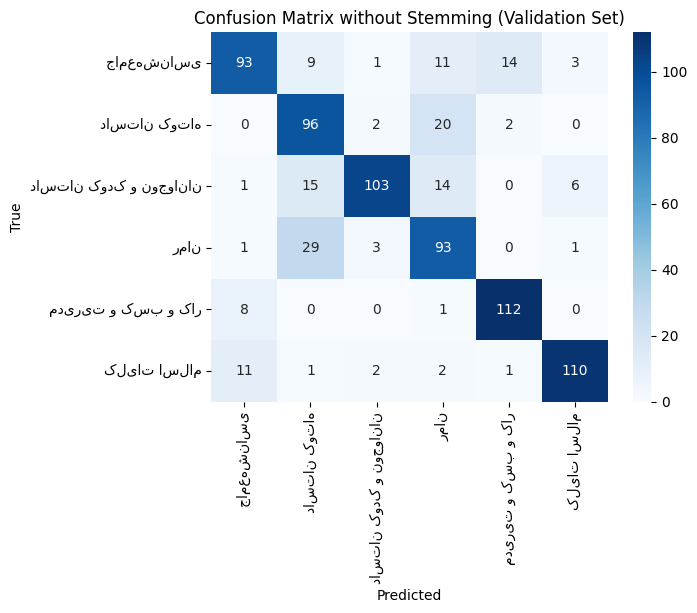

Classification Report (No Stemming - Test Set):
                        precision    recall  f1-score   support

           جامعه‌شناسی       0.76      0.89      0.82        75
          داستان کوتاه       0.72      0.72      0.72        75
داستان کودک و نوجوانان       0.93      0.83      0.87        75
                  رمان       0.68      0.75      0.71        75
    مدیریت و کسب و کار       0.94      0.91      0.93        75
           کلیات اسلام       0.94      0.83      0.88        75

              accuracy                           0.82       450
             macro avg       0.83      0.82      0.82       450
          weighted avg       0.83      0.82      0.82       450



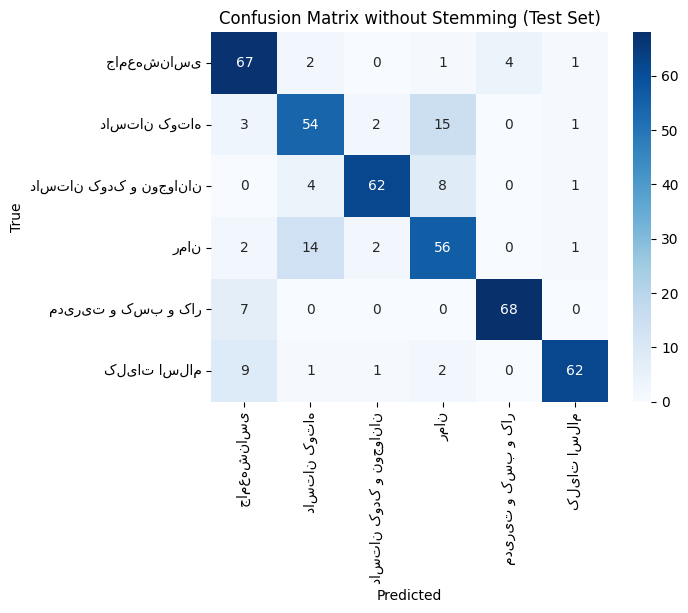

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters (with stemming): {'clf__alpha': 0.1, 'vect__ngram_range': (1, 3), 'vect__stop_words': None}
Best score (with stemming): 0.8207282913165267
Classification Report (With Stemming - Validation Set):
                        precision    recall  f1-score   support

           جامعه‌شناسی       0.84      0.75      0.79       131
          داستان کوتاه       0.68      0.83      0.75       120
داستان کودک و نوجوانان       0.94      0.73      0.82       139
                  رمان       0.67      0.76      0.72       127
    مدیریت و کسب و کار       0.86      0.93      0.89       121
           کلیات اسلام       0.92      0.86      0.89       127

              accuracy                           0.81       765
             macro avg       0.82      0.81      0.81       765
          weighted avg       0.82      0.81      0.81       765



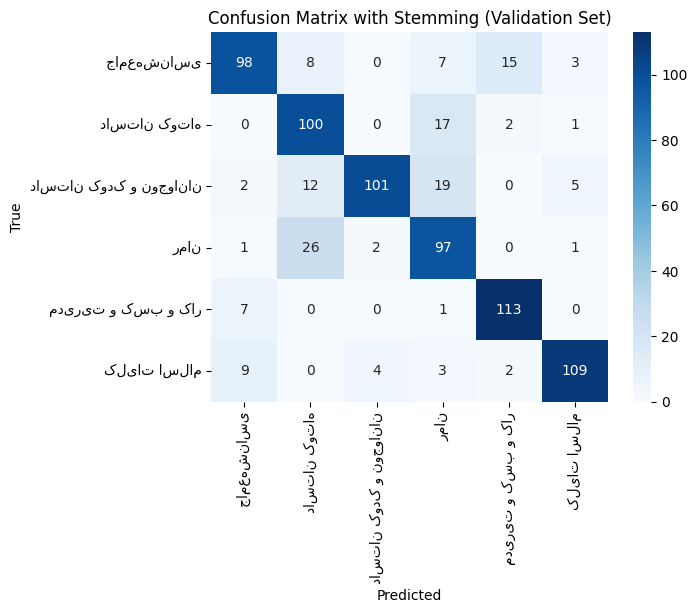

Classification Report (With Stemming - Test Set):
                        precision    recall  f1-score   support

           جامعه‌شناسی       0.76      0.89      0.82        75
          داستان کوتاه       0.73      0.71      0.72        75
داستان کودک و نوجوانان       0.94      0.80      0.86        75
                  رمان       0.66      0.79      0.72        75
    مدیریت و کسب و کار       0.94      0.89      0.92        75
           کلیات اسلام       0.94      0.81      0.87        75

              accuracy                           0.82       450
             macro avg       0.83      0.82      0.82       450
          weighted avg       0.83      0.82      0.82       450



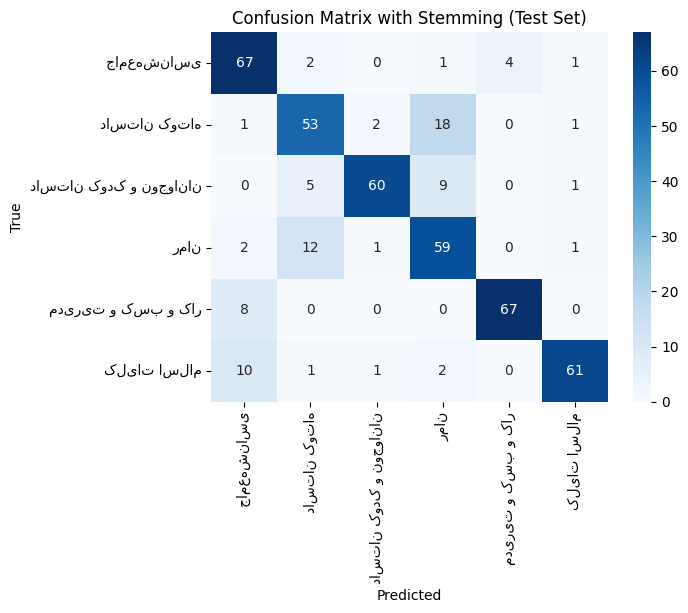

In [ ]:
# modelling
# without stemming
df_train['text_no_stemming'] = df_train['text'].apply(lambda x: preprocess_text(x, use_stemming=False))
df_test['text_no_stemming'] = df_test['text'].apply(lambda x: preprocess_text(x, use_stemming=False))

pipeline_no_stemming = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to Bag of Words
    ('clf', MultinomialNB()),     # Train a Naive Bayes classifier
])

param_grid_no_stemming = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigrams, bigrams, trigrams
    'vect__stop_words': [None, 'english'],
    'clf__alpha': [0.1, 1.0, 10.0],
}

grid_search_no_stemming = GridSearchCV(pipeline_no_stemming, param_grid_no_stemming, cv=5, n_jobs=-1, verbose=1)

X_train_no_stemming, X_val_no_stemming, y_train, y_val = train_test_split(df_train['text_no_stemming'], df_train['categories'], test_size=0.3, random_state=42)

grid_search_no_stemming.fit(X_train_no_stemming, y_train)

print(f"Best parameters (no stemming): {grid_search_no_stemming.best_params_}")
print(f"Best score (no stemming): {grid_search_no_stemming.best_score_}")

# validation set
y_pred_no_stemming = grid_search_no_stemming.predict(X_val_no_stemming)

print("Classification Report (No Stemming - Validation Set):")
print(classification_report(y_val, y_pred_no_stemming))

cm_no_stemming = confusion_matrix(y_val, y_pred_no_stemming)
sns.heatmap(cm_no_stemming, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_no_stemming.classes_, yticklabels=grid_search_no_stemming.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix without Stemming (Validation Set)')
plt.show()

# test dataset
y_test_pred_no_stemming = grid_search_no_stemming.predict(df_test['text_no_stemming'])
print("Classification Report (No Stemming - Test Set):")
print(classification_report(df_test['categories'], y_test_pred_no_stemming))
cm_test_no_stemming = confusion_matrix(df_test['categories'], y_test_pred_no_stemming)
sns.heatmap(cm_test_no_stemming, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_no_stemming.classes_, yticklabels=grid_search_no_stemming.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix without Stemming (Test Set)')
plt.show()

# with stemming
df_train['text_with_stemming'] = df_train['text'].apply(lambda x: preprocess_text(x, use_stemming=True))
df_test['text_with_stemming'] = df_test['text'].apply(lambda x: preprocess_text(x, use_stemming=True))

pipeline_with_stemming = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to Bag of Words
    ('clf', MultinomialNB()),     # Train a Naive Bayes classifier
])

param_grid_with_stemming = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'vect__stop_words': [None, 'english'],
    'clf__alpha': [0.1, 1.0, 10.0],
}

grid_search_with_stemming = GridSearchCV(pipeline_with_stemming, param_grid_with_stemming, cv=5, n_jobs=-1, verbose=1)

X_train_with_stemming, X_val_with_stemming, y_train, y_val = train_test_split(df_train['text_with_stemming'], df_train['categories'], test_size=0.3, random_state=42)

grid_search_with_stemming.fit(X_train_with_stemming, y_train)

print(f"Best parameters (with stemming): {grid_search_with_stemming.best_params_}")
print(f"Best score (with stemming): {grid_search_with_stemming.best_score_}")

# validation set
y_pred_with_stemming = grid_search_with_stemming.predict(X_val_with_stemming)

print("Classification Report (With Stemming - Validation Set):")
print(classification_report(y_val, y_pred_with_stemming))
cm_with_stemming = confusion_matrix(y_val, y_pred_with_stemming)
sns.heatmap(cm_with_stemming, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_with_stemming.classes_, yticklabels=grid_search_with_stemming.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Stemming (Validation Set)')
plt.show()


# test dataset
y_test_pred_with_stemming = grid_search_with_stemming.predict(df_test['text_with_stemming'])
print("Classification Report (With Stemming - Test Set):")
print(classification_report(df_test['categories'], y_test_pred_with_stemming))
cm_test_with_stemming = confusion_matrix(df_test['categories'], y_test_pred_with_stemming)
sns.heatmap(cm_test_with_stemming, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search_with_stemming.classes_, yticklabels=grid_search_with_stemming.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Stemming (Test Set)')
plt.show()
